# Исследование объявлений о продаже квартир

В вашем архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

---
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#data.to_csv('data_flats.csv')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
print(data.shape)
print(data.columns)
print(data.info())

(23699, 22)
Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object

In [4]:
data.duplicated().sum()

0

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Пропусков в столбцах floors_total около 80, заменим значением этажа квартиры. Большого влияния эти данные не окажут.

Большое количество пропусков в столбце is_apartment и balcony объясняется тем, что в большинстве случаев, когда квартира не является апартаментами или в ней нет балкона, соответствующие поля просто оставляют пустыми. Эти пропуски можно заполнить False для is_apartment (тип столбца заменим на bool) и 0 для количества балконов. 

Пропуски locality_name будет обоснованным заполнить значением 'Санкт-Петербург'. Свой город может забыть указать житель Москвы или Санкт-Петербурга, но вряд ли это сделает житель деревни Большие Колпаны.

Очень похожее количество не пустых значений в столбцах airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 объясняется тем, что это автоматически генерируемые значения. Скорее всего, пропуски относятся к квартирам, для которых эти параметры не имеют смысла - если ты живешь в Кингисеппе, то расстояние до центра СПб не очень важно.

Пропуски в days_exposition возможно объясняются тем, что эти квартиры до сих пор не проданы.
Столбцы balcony, floor_total и days_exposition стоит перевести в int, так как эти значения целочисленные. Столбец first_day_exposition приведем к типу datetime.

Любопытно отсутствие дубликатов. Видимо, данные уже проходили какую-то первичную обработку.

### Предобработка данных

Меняем типы данных

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype('bool')

data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')

data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'] = data['floors_total'].astype('int')

In [7]:
data['days_exposition'] = pd.to_numeric(data['days_exposition'], downcast='integer', errors='ignore')

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Обрабатываем пропуски в площади кухни и жилой.     
Для заполнения пропусков высчитаем среднюю площадь комнаты и кухни для квартир с аналогичным числом комнат. Для студий и свободной планировки укажем площадь кухни 0.

In [9]:
import math

def kitchen(row):
#Возвращает медиану по площади для соответствующего числа комнат, если текущее значение NaN 
    rooms = row['rooms']
    kitchen_area = row['kitchen_area']
    if math.isnan(kitchen_area):
        if rooms == 0: #если студия или свободная планировка, то площадь кухни 0 
            return 0
        return data[(data['rooms'] == rooms)]['kitchen_area'].median()
    return kitchen_area #если не NaN оставляем старое значение

def living(row):
#Возвращает медиану по площади для соответствующего числа комнат, если текущее значение NaN 
    rooms = row['rooms']
    living_area = row['living_area']
    if math.isnan(living_area):
        return data[(data['rooms'] == rooms)]['living_area'].median()
    return living_area #если не NaN оставляем старое значение

data['kitchen_space'] = data.apply(kitchen, axis=1)
data['living_space'] = data.apply(living, axis=1)

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
kitchen_space               0
living_space                0
dtype: int64

### Добавление в таблицу новых параметров

In [10]:
data['sq_meter_price'] = data['last_price'] / data['total_area'] #цена кв. метра
data['week_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday #день недели
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month #месяц
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year #год

def floor_type (row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'
 
data['floor_type'] = data.apply(floor_type, axis=1)
 
data['living_to_total'] = data['living_space'] / data['total_area'] #соотношение жилой к общей
data['kitchen_to_total'] = data['kitchen_space'] / data['total_area'] #соотношение кухни к общей


data.head(10)    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,kitchen_space,living_space,sq_meter_price,week_day,month,year,floor_type,living_to_total,kitchen_to_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,NaN,25.00,51.00,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,81.0,11.00,18.60,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,558.0,8.30,34.30,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,424.0,9.50,45.00,408176.100629,4,7,2015,другой,0.283019,0.059748
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121.0,41.00,32.00,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,55.0,9.10,14.40,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,155.0,14.40,10.60,99195.710456,3,11,2017,другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,NaN,18.90,30.50,110544.692737,3,4,2019,другой,0.425978,0.263966
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,189.0,8.81,15.43,87454.764777,2,5,2018,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,289.0,6.50,43.60,88524.590164,6,2,2017,другой,0.714754,0.106557


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

### Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Строим графики Q1-3\*IQR до Q3+3\*IQR

In [11]:
import matplotlib.pyplot as plt
import numpy as np

total_area


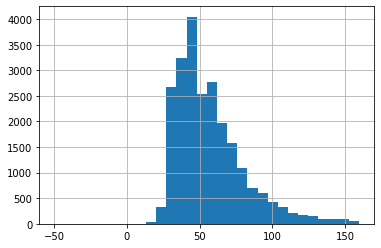

last_price


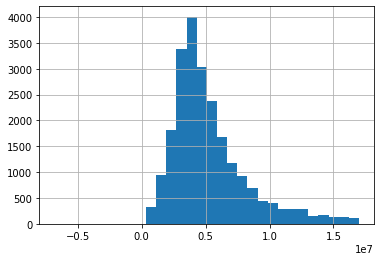

rooms


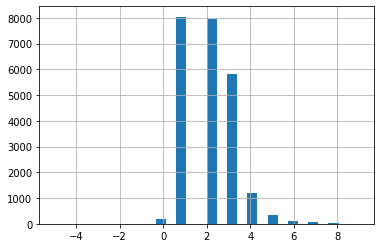

ceiling_height


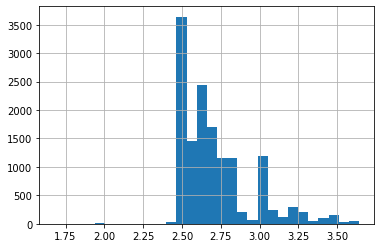

In [12]:
for argument in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    Q1 = np.percentile(data[argument].dropna(), 25)
    Q3 = np.percentile(data[argument].dropna(), 75)
    IQR = Q3 - Q1
    print(argument)
    data[argument].hist(bins=30, range=(Q1-3 * IQR, Q3 + 3 * IQR))
    plt.show()

 Распределение схоже с Пуассоновским, есть пик во всех гистограммах, это 2хкомнатные квартиры площадью около 50 метров и высотой потолков 2,5м, ценой около 5 миллионов рублей. Это похоже на правду.
 
 При этом средняя цена квартиры у нас - 6,5 миллионов, но медиана - лишь 4,65. На гистограмме мы видим длинный хвост влево из квартир с высокой ценой (20 миллионов и более). Их относительно немного, но они очевидно, сильно влияют на среднюю цену. Посмотрим, что можно с этим сделать. 
 
 Построим диаграмму размаха.

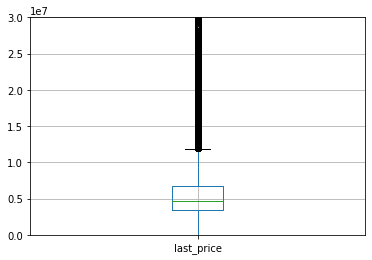

In [13]:
plt.ylim(0,30000000)
data.boxplot(column='last_price')

Согласно диаграмме, верхняя граница диапазона нормального диапазона Q3 + 1,5IQR = 11.9

Отбросим все квартиры с ценой от 12 миллионов.

count    2.170000e+04
mean     4.860269e+06
std      2.246415e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.199900e+07
Name: last_price, dtype: float64


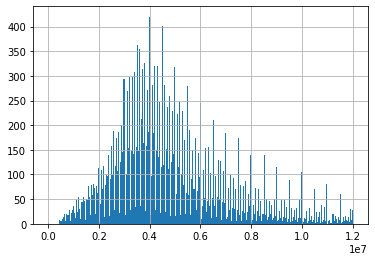

In [14]:
good_data = data.query('last_price<12000000')

#data['last_price'].hist(bins=300, range=(0, 12000000))
good_data['last_price'].hist(bins=300)

print(good_data['last_price'].describe())

Среднее и медиана стали ближе (4,86 и 4,4), а распределение стало ближе к нормальному.

#### Время продажи квартир

count    19057.000000
mean       173.483654
std        211.935924
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1580.000000
Name: days_exposition, dtype: float64


0    45.0
dtype: float64

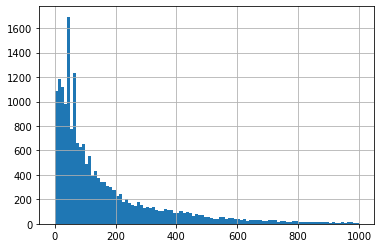

In [15]:
good_data['days_exposition'].hist(bins=100, range=(0,1000))
print(good_data['days_exposition'].describe())
good_data['days_exposition'].mode()

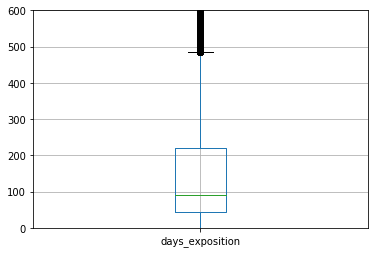

In [16]:
plt.ylim(0,600)
good_data.boxplot(column='days_exposition')

Согласно диаграмме, верхняя граница диапазона нормального диапазона Q3 + 1,5IQR = 484 дня

Отбросим все продажи с большим временем.

count    17469.000000
mean       122.374377
std        115.099195
min          1.000000
25%         39.000000
50%         80.000000
75%        175.000000
max        483.000000
Name: days_exposition, dtype: float64
0    45.0
dtype: float64


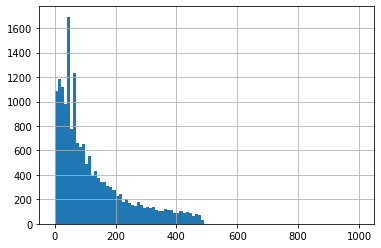

In [17]:
good_data = good_data.query('days_exposition<484')
good_data['days_exposition'].hist(bins=100, range=(0,1000))
print(good_data['days_exposition'].describe())
print(good_data['days_exposition'].mode())

Для неотфильтрованныъ данныъ былос реднее время продажи квартиры - 180 дней(6 месяцев), медиана - 3 месяца. Очень быстрая продажа - первый квартиль, менее 45 дней; очень долгая - четвертый, более 232 дней (7,7 месяца). Самое частое значение - 45.

Отбросив выбросы в виде сверхдолгих продаж (16 месяцев и больше), получили среднее время 122 дня (уменьшилось на почти на 2 месяца!), медиана уменьшилась на 10 дней (до 80 дней). Сверхбыстая продажа - менее 40 дней, сверхдолгая - больше 175(почти полгода).

### Факторы, влияющие на цену квартиры

#### Число комнат

0.4604899112035635


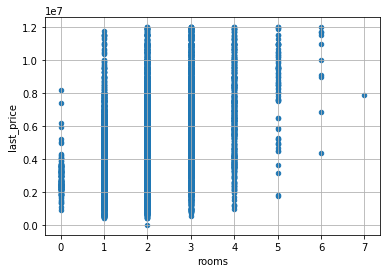

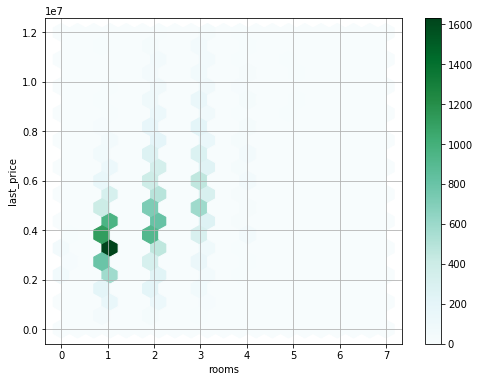

In [18]:
print(good_data['last_price'].corr(good_data['rooms']))
good_data.plot(x='rooms', y='last_price', kind='scatter', grid=True)
good_data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)


Есть корреляция между ценой квартиры и числом комнат, но не такая очевидная и прямолинейная как могло бы ожидаться. 

#### Удаленность от центра

-0.3425044028146335


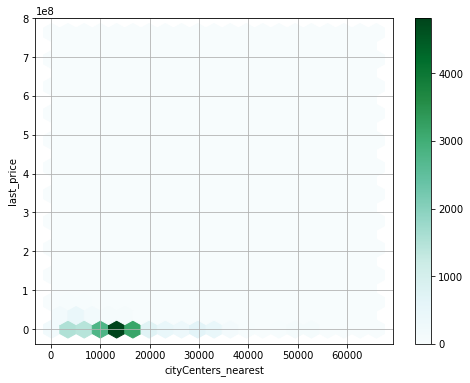

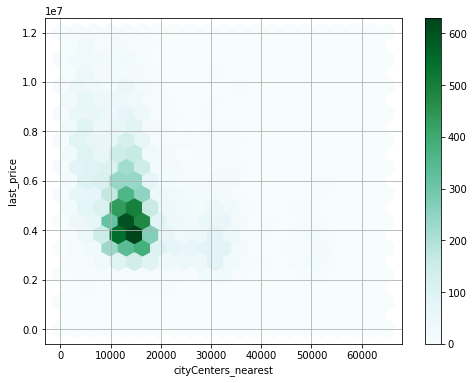

In [19]:
print(good_data['last_price'].corr(good_data['cityCenters_nearest']))
#data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, xlim=(0,15000))
data.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
good_data.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
#good_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, xlim=(0,15000))


С удалением от центра цена падает. 
Если рассматривать все данные, то видим, что супердорогие квартиры, которые мы решили выкинуть из выборки, находятся как раз рядом в центральных районах.

#### Этажность

Первый
count    2.135000e+03
mean     4.002852e+06
std      1.936145e+06
min      4.400000e+05
25%      2.700000e+06
50%      3.700000e+06
75%      4.955000e+06
max      1.193500e+07
Name: last_price, dtype: float64
Последний
count    2.414000e+03
mean     4.449803e+06
std      2.308714e+06
min      1.219000e+04
25%      2.900000e+06
50%      4.000000e+06
75%      5.500000e+06
max      1.199900e+07
Name: last_price, dtype: float64
Другой
count    1.292000e+04
mean     4.935537e+06
std      2.133806e+06
min      4.500000e+05
25%      3.480000e+06
50%      4.500000e+06
75%      6.000000e+06
max      1.199900e+07
Name: last_price, dtype: float64


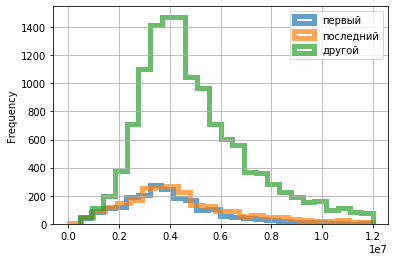

In [20]:
ax = good_data.query('floor_type=="первый"').plot(kind='hist', y='last_price', histtype='step',bins=25,linewidth=5, alpha=0.7, label='первый')
good_data.query('floor_type=="последний"').plot(kind='hist', y='last_price', histtype='step', bins=25,
linewidth=5, alpha=0.7, label='последний', ax=ax, grid=True, legend=True)
good_data.query('floor_type=="другой"').plot(kind='hist', y='last_price', histtype='step', bins=25,
linewidth=5, alpha=0.7, label='другой', ax=ax, grid=True, legend=True)

print('Первый')
print(good_data.query('floor_type=="первый"')['last_price'].describe())
print('Последний')
print(good_data.query('floor_type=="последний"')['last_price'].describe())
print('Другой')
print(good_data.query('floor_type=="другой"')['last_price'].describe())

Дешевле всего  идут квартиры, расположенные на 1м этаже (медианное значение 3,7 млн.), затем на последнем(4 млн), затем все остальные этажи (4,5 млн). Разница довольно заметная.

#### Дата размещения

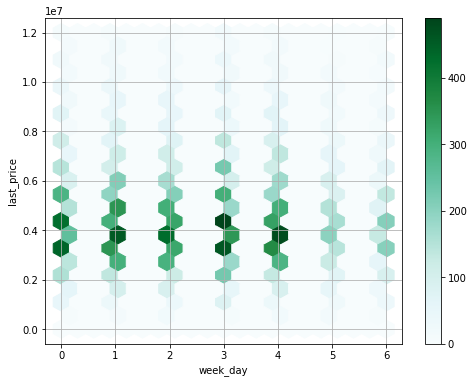

In [21]:
#good_data.plot(x='week_day', y='last_price', kind='scatter', grid=True)
good_data.plot(x='week_day', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Как и ожидалось - цена не зависит от дня недели размещения квартиры. Но в выходные размещается меньше объявлений.

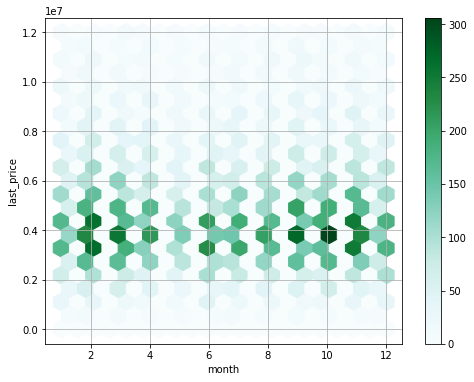

In [22]:
good_data.plot(x='month', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

От сезона цена тоже зависит незначительно. Но есть бросающееся в глаза снижение числа объявлений до и после нового года, а также в мае (очевидно, на активность рынка влияют праздники).

1         3350000.0
4        10000000.0
5         2890000.0
6         3700000.0
8         2900000.0
            ...    
23689     3550000.0
23690     5500000.0
23692     1350000.0
23693     4600000.0
23695     3100000.0
Name: last_price, Length: 17469, dtype: float64

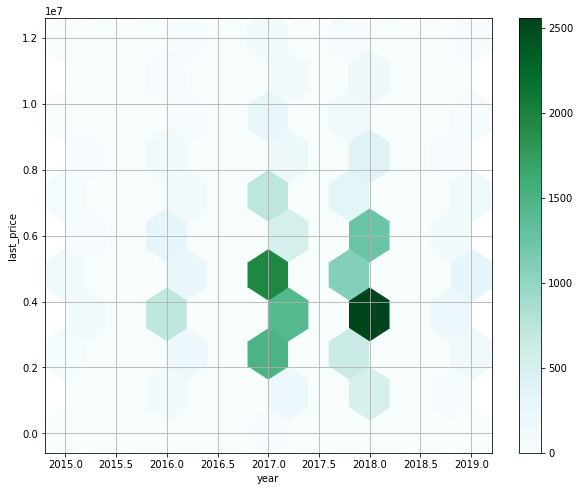

In [23]:
good_data.plot(x='year', y='last_price', kind='hexbin', gridsize=10, figsize=(10, 8), sharex=False, grid=True)
good_data['last_price']

Увы, цены растут каждый год. Любопытно, что в 2018м при общем росте цены, больше всего квартир продано в сегменте 3-4 млн, а годом раньше больше всего продавались квартиры за 5млн.


### 10  населенных пунктов с наибольшим числом объявлений

In [24]:
city_mean_price = good_data.pivot_table(index='locality_name', values='sq_meter_price', aggfunc=['count', 'mean'])

city_mean_price.columns = ['count', 'sq_meter_mean']

#создаем список из верхних топ-10 городов
top_cities = city_mean_price.sort_values(by='count', ascending=False).head(11)
print(top_cities.sort_values(by='sq_meter_mean'))
top_cities.index

                   count  sq_meter_mean
locality_name                          
Выборг               191   56947.835916
Всеволожск           307   66743.025239
Гатчина              242   68002.586910
Колпино              290   74496.536397
посёлок Шушары       385   77938.483694
Петергоф             153   82948.964929
посёлок Мурино       482   86091.435043
посёлок Парголово    286   89112.942605
деревня Кудрово      265   92585.904864
Пушкин               261   99218.029393
Санкт-Петербург    11241  104286.937939


Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Колпино', 'посёлок Парголово', 'деревня Кудрово', 'Пушкин', 'Гатчина',
       'Выборг', 'Петергоф'],
      dtype='object', name='locality_name')

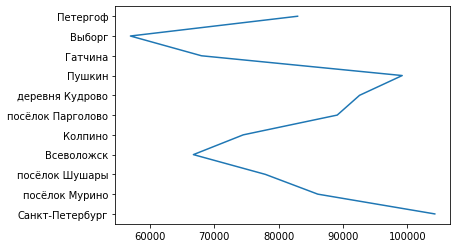

In [25]:
#top_cities.plot(x= top_cities.index.values y='sq_meter_mean', kind='scatter', grid=True)
#fig = plt.figure(figsize=(8,4), dpi=100)
plt.plot(top_cities['sq_meter_mean'], top_cities.index.values)

 Дороже всего (сюрприз!) в Санкт-Петербурге. Дальше идут ближайшие пригороды на расстоянии получаса езды на электричке (лучший пригород - Пушкин). Замыкает список  удаленный на 100км Выборг.

### Определение центра

In [26]:
spb_data = good_data.query('locality_name=="Санкт-Петербург"')
spb_data.dropna(subset=['cityCenters_nearest'], inplace=True)
spb_data['cityCenters_nearest_int'] = (spb_data['cityCenters_nearest']/1000).astype('int')
cityCenters_dist = spb_data['cityCenters_nearest_int'].unique()
print(cityCenters_dist)

columns = ['distance', 'price']
price_from_dist = pd.DataFrame(columns=columns)

for dist in range(32):
    price_from_dist.loc[dist, 'distance'] = dist
    price_from_dist.loc[dist, 'price'] = spb_data.query('cityCenters_nearest_int==@dist')['sq_meter_price'].mean()

price_from_dist['distance'] = pd.to_numeric(price_from_dist['distance'], errors='coerce')
price_from_dist['price'] = pd.to_numeric(price_from_dist['price'], errors='coerce')
print(price_from_dist)

    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[ 8 15 13 14 10  9  2 11 12 16  7  5  6 21 17  3  4 24 25 20  1 22 18 28
 19  0 23 27 26 31 29]
    distance          price
0          0  122521.864604
1          1  114213.759357
2          2  111888.989836
3          3  109137.501924
4          4  118051.885240
5          5  118390.440062
6          6  118439.870914
7          7  117473.715024
8          8  110784.432375
9          9  105068.977135
10        10  105013.398640
11        11  103352.760464
12        12  105633.684710
13        13  104839.842723
14        14  102065.957456
15        15   99201.968466
16        16   97557.281782
17        17   93267.267974
18        18   93014.227831
19        19   96645.307594
20        20  104049.853533
21        21   90646.926355
22        22   86646.711999
23        23   89140.211926
24        24   82440.343912
25        25   91178.159300
26        26   75171.911041
27        27   70312.500000
28        28   80794.901711
29        29   65460.203079
30        30            NaN
31      

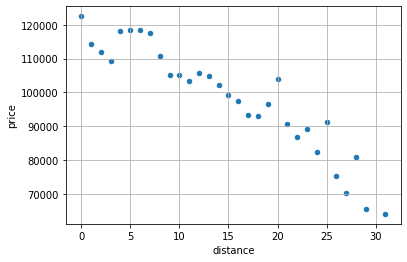

In [27]:
price_from_dist.plot(x='distance', y='price', kind='scatter', grid=True)

Резкий скачок со 120 до 140 тысяч рублей за метр происходит на 7км от центра города. Это и будем считать центральной зоной.

### Анализ квартир в центральной зоне

In [28]:
spb_center_data = spb_data.query('cityCenters_nearest_int<=7')
#Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.
print(spb_center_data.describe())
print(good_data.describe())

       total_images    last_price   total_area        rooms  ceiling_height  \
count   1874.000000  1.874000e+03  1874.000000  1874.000000     1143.000000   
mean       9.579509  7.230801e+06    65.354973     2.298292        3.018486   
std        5.699760  2.224081e+06    24.104554     1.024592        0.793954   
min        0.000000  1.600000e+06    12.000000     0.000000        2.400000   
25%        5.000000  5.550000e+06    46.600000     2.000000        2.750000   
50%        9.000000  7.025000e+06    62.150000     2.000000        3.000000   
75%       14.000000  8.809000e+06    80.000000     3.000000        3.200000   
max       32.000000  1.199900e+07   206.000000     6.000000       27.000000   

       floors_total  living_area        floor  kitchen_area      balcony  ...  \
count   1874.000000  1740.000000  1874.000000   1692.000000  1874.000000  ...   
mean       7.135005    38.456782     4.059765     11.154716     0.282284  ...   
std        4.047294    17.616191     2.916648

Площадь квартир в центральной зоне больше средней по городу на треть, цена квартиры - почти в 2 раза! И даже потолки выше на 40см!

Лучше жить в центре и быть богатым и здоровым.


## Факторы, влияющие на цену квартиру (центр)

### Количество комнат

-0.5447536441676527


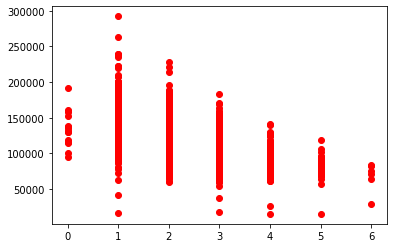

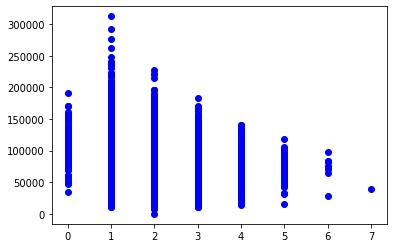

In [29]:
print(spb_center_data['sq_meter_price'].corr(spb_center_data['rooms']))
plt.scatter(spb_center_data['rooms'], spb_center_data['sq_meter_price'], color='r')
plt.show()
plt.scatter(good_data['rooms'], good_data['sq_meter_price'], color='b')
plt.show()

### Удаленность от центра

0.059431385695585016
Центр


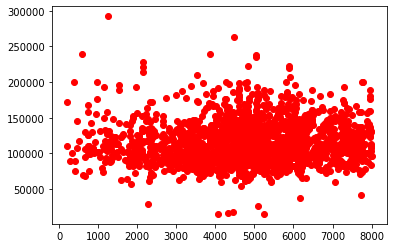

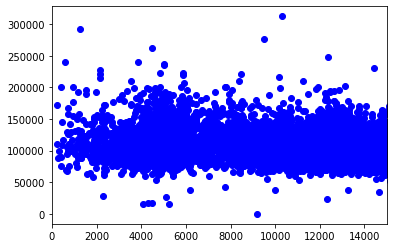

In [30]:
print(spb_center_data['sq_meter_price'].corr(spb_center_data['cityCenters_nearest_int']))

print('Центр')
plt.scatter(spb_center_data['cityCenters_nearest'], spb_center_data['sq_meter_price'], color='r')
plt.show()
plt.scatter(good_data['cityCenters_nearest'], good_data['sq_meter_price'], color='b')
plt.gca().set(xlim=(0, 15000))
plt.show()


Тут у нас просто левая половина графика для общей базы. 

### Этаж

count       255.000000
mean     106945.006800
std       23208.301716
min       17391.304348
25%       90683.652631
50%      103333.333333
75%      121639.576883
max      192592.555556
Name: sq_meter_price, dtype: float64

count       321.000000
mean     110767.530510
std       26881.396863
min       28919.631094
25%       92473.118280
50%      106250.000000
75%      124750.000000
max      240000.040000
Name: sq_meter_price, dtype: float64

count      1298.000000
mean     119374.441647
std       30868.362770
min       15345.268542
25%       97380.310368
50%      115069.480568
75%      137822.050928
max      292307.692308
Name: sq_meter_price, dtype: float64


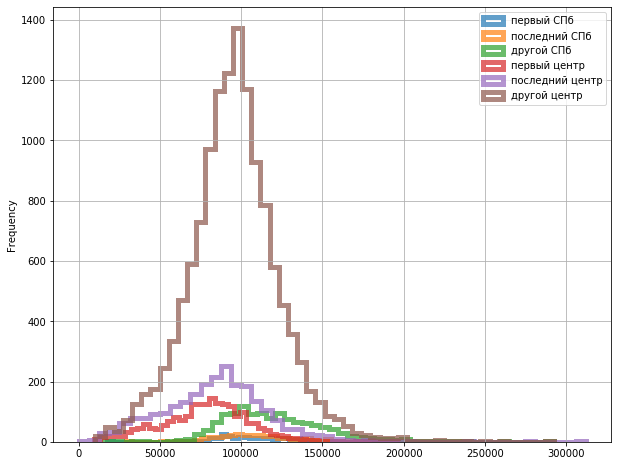

In [31]:
ax = spb_center_data.query('floor_type=="первый"').plot(kind='hist', y='sq_meter_price', histtype='step',bins=50,linewidth=5, alpha=0.7, figsize=(10,8), label='первый СПб')
spb_center_data.query('floor_type=="последний"').plot(kind='hist', y='sq_meter_price', histtype='step', bins=50,
linewidth=5, alpha=0.7, label='последний СПб', ax=ax, grid=True, legend=True)
spb_center_data.query('floor_type=="другой"').plot(kind='hist', y='sq_meter_price', histtype='step', bins=50,
linewidth=5, alpha=0.7, label='другой СПб', ax=ax, grid=True, legend=True)
good_data.query('floor_type=="первый"').plot(kind='hist', y='sq_meter_price', histtype='step', bins=50,
linewidth=5, alpha=0.7, label='первый центр', ax=ax, grid=True, legend=True)
good_data.query('floor_type=="последний"').plot(kind='hist', y='sq_meter_price', histtype='step', bins=50,
linewidth=5, alpha=0.7, label='последний центр', ax=ax, grid=True, legend=True)
good_data.query('floor_type=="другой"').plot(kind='hist', y='sq_meter_price', histtype='step', bins=50,
linewidth=5, alpha=0.7, label='другой центр', ax=ax, grid=True, legend=True)

print(spb_center_data.query('floor_type=="первый"')['sq_meter_price'].describe())
print()
print(spb_center_data.query('floor_type=="последний"')['sq_meter_price'].describe())
print()
print(spb_center_data.query('floor_type=="другой"')['sq_meter_price'].describe())

Наблюдаем ту же картину, что и по всему городу - дешевле всего  идут квартиры, расположенные на 1м этаже, затем на последнем, затем все остальные этажи . Но и сами цены выше (108 против 80, 117 против 94, 127 против 96) и шаг между категориями составляет 10 тысяч вместо 5.

### Год размещения

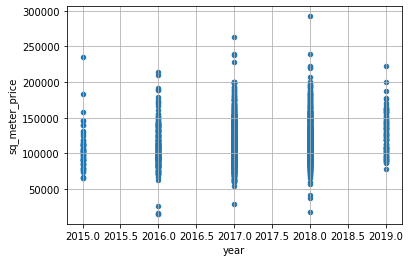

In [32]:
spb_center_data.plot(x='year', y='sq_meter_price', kind='scatter', grid=True)

При этом цена за квадратный метр в центре практически не растет с 2015го года.

### Общий вывод

Согласно проведенному исследованию, можем сказать, что средняя продаваемая квартира - однокомнатная, площадью около 50 квадратных метров, с ценой около 4,5 миллионов. Дешевле всего стоят квартиры на 1м, затем на последнем этажах.

Дороже всего стоят квартиры в Санкт-Петербурге, затем идут ближайшие пригороды, затем второй крупный город - Выборг.

Что же касается квартир в центральной зоне города (путем анализа цен выяснили что это зона с радиусом 7 км), то для них немного другая картина. Типичная квартира имеет более высокие потолки, больше в 1,5 раза по площади и стоит в 2 раза дороже.
Но при этом почти не дорожает.